# Machine Learning Model for Hand Written Digits

_This project aims at comparing two different machine learning models to predict pre-loaded hand written digits data from Scikit Learn dataset module._

### Aim
- Test the effect of using K-Nearest Neighbor Algorithm on the dataset
- See the effect of changing the number of Neighbors used in the K-Nearest Neighbor Algorithm
- Compare the K-Nearest Neighbor Algorithm with Neural Network Model
- See the effect of changing the number of neurons used in the Neural Network model
- See the effect of changing the activation function used in the Neural Network model
- See the effect of multiple layers used in the Neural Network model

In [1]:
#import necessary libraries

import numpy as np
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import KFold
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#load the dataset

from sklearn.datasets import load_digits
digits = load_digits()

In [3]:
digits.keys()

dict_keys(['data', 'target', 'target_names', 'images', 'DESCR'])

__Seen below is the characteristics of the dataset and important information about it__

In [4]:
print(digits.DESCR[:660], "\n...")

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 5620
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.
 
...


In [5]:
#Preview the dataset
data = digits.data
data = pd.DataFrame(data)
data.head()

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0


### Important Information
- There are 64 features(columns) in the dataset that contribute to each image.
- This generates an input matrix of 8x8 where each element is an integer in the range 0..16. 

### Visualize some Images of the Hand Written Digits

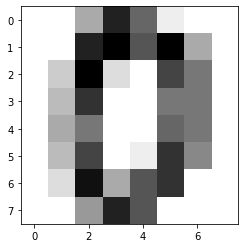

In [6]:
first_row = data.iloc[0]
first_image = first_row.values
first_image = first_image.reshape(8,8)

plt.imshow(first_image, cmap='gray_r')

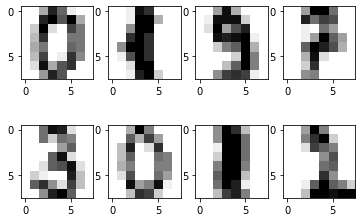

In [7]:
#Visualize multiple images

fig, ax = plt.subplots(2,4)

ax[0, 0].imshow(data.iloc[0].values.reshape(8,8), cmap='gray_r')
ax[0, 1].imshow(data.iloc[99].values.reshape(8,8), cmap='gray_r')
ax[0, 2].imshow(data.iloc[199].values.reshape(8,8), cmap='gray_r')
ax[0, 3].imshow(data.iloc[299].values.reshape(8,8), cmap='gray_r')

ax[1, 0].imshow(data.iloc[999].values.reshape(8,8), cmap='gray_r')
ax[1, 1].imshow(data.iloc[1099].values.reshape(8,8), cmap='gray_r')
ax[1, 2].imshow(data.iloc[1199].values.reshape(8,8), cmap='gray_r')
ax[1, 3].imshow(data.iloc[1299].values.reshape(8,8), cmap='gray_r')

In [8]:
#Store the labels(Results) as a pandas series
labels = pd.Series(digits.target)
labels.value_counts().sort_index()

0    178
1    182
2    177
3    183
4    181
5    182
6    181
7    179
8    174
9    180
dtype: int64

# K-Nearest Neighbor Algorithm

In [9]:
def train_knn(nneighbors, train_features, train_labels):
    'This function uses knn-classifier algorithm on the dataset'
    
    knn = KNeighborsClassifier(n_neighbors=nneighbors)
    knn.fit(train_features, train_labels)
    return knn

def test(model, test_features, test_labels):
    'This function returns the accuracy of a specific model used'
    
    predictions = model.predict(test_features)
    train_test_df = pd.DataFrame()
    train_test_df['correct_label'] = test_labels
    train_test_df['predicted_label'] = predictions
    accuracy = sum(train_test_df['correct_label'] == train_test_df['predicted_label']) / len(train_test_df)
    return accuracy

def cross_validate(k):
    fold_accuracies = []
    kf = KFold(n_splits=4, random_state=2)
    for train_index, test_index in kf.split(data):
        train_features, test_features = data.loc[train_index], data.loc[test_index]
        train_labels, test_labels = labels.loc[train_index], labels.loc[test_index]
        model = train_knn(k, train_features, train_labels)
        overall_accuracy = test(model, test_features, test_labels)
        fold_accuracies.append(overall_accuracy)
    return fold_accuracies

In [10]:
#Find the fold accuracy using knn algorithm with one neighbor        
knn_one_accuracies = cross_validate(1)

np.mean(knn_one_accuracies)

0.9677233358079684

#### Insight

*For this model the test accuracy is about 0.96, which means we made the right prediction for __96%__ of the digits in the test dataset. Under some mathematical assumptions, this means we can expect our model to be correct 96% of the time for new digits*

## Changing the number of Neighbors used in the K-Nearest Neighbor Algorithm

In [11]:
k_values = list(range(1,11))
mean_k_accuracies = []
for i in k_values:
    result = cross_validate(i)
    mean_k_accuracies.append(np.mean(result))
mean_k_accuracies

[0.9677233358079684,
 0.9616010888393962,
 0.9627183865379857,
 0.9649480326651819,
 0.9621665429349171,
 0.9588270230141054,
 0.9571591190299431,
 0.9571578817124474,
 0.9543801039346697,
 0.9527097253155159]

#### Visualize the Result

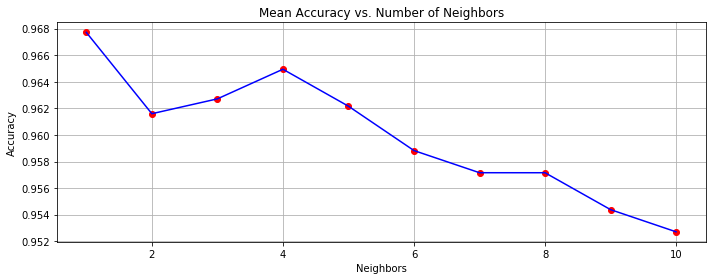

In [12]:
plt.figure(figsize=(10,4))
plt.title("Mean Accuracy vs. Number of Neighbors")
plt.plot(k_values, mean_k_accuracies, 'ro')
plt.plot(k_values, mean_k_accuracies, 'b')
plt.xlabel('Neighbors')
plt.ylabel('Accuracy')
plt.tight_layout()
plt.grid()

#### Insight

*Increasing the number of neighbors actually reduces the accuracy as seen from the line chart above*

# Neural Network Model

_For the neural network model, the MLPclassifier is used in predicting the digits returned. Recall that MLPregression is used for predicting continuous variables_

In [13]:
#Single layer Neural Network Model

def train_nn(n, train_features, train_labels):
    'This function uses MLPclassifier algorithm on the dataset'
    
    mlp = MLPClassifier(hidden_layer_sizes=(n,), activation='logistic', max_iter=2000)
    
    'The activation function used here is logistic(i.e sigmoid function)'
    mlp.fit(train_features, train_labels)
    return mlp

def test_nn(model, test_features, test_labels):
    'This function returns the accuracy of a specific model used'
    
    predictions = model.predict(test_features)
    train_test_df = pd.DataFrame()
    train_test_df['correct_label'] = test_labels
    train_test_df['predicted_label'] = predictions
    accuracy = sum(train_test_df['correct_label'] == train_test_df['predicted_label']) / len(train_test_df)
    return accuracy

def cross_validate_nn(k):
    fold_accuracies = []
    kf = KFold(n_splits=4, random_state=2)
    for train_index, test_index in kf.split(data):
        train_features, test_features = data.loc[train_index], data.loc[test_index]
        train_labels, test_labels = labels.loc[train_index], labels.loc[test_index]
        model = train_nn(k, train_features, train_labels)
        overall_accuracy = test_nn(model, test_features, test_labels)
        fold_accuracies.append(overall_accuracy)
    return fold_accuracies

In [14]:
nn_eight_neurons = cross_validate_nn(8)
np.mean(nn_eight_neurons)

0.8836995793120515

#### Insight

_Using eight neurons on this single layer neural network model performs way less than the Knn Algorithm at a __88%__ accuracy_

Text(0.5, 1, 'Neural Network Accuracies vs Number of Neurons Used')

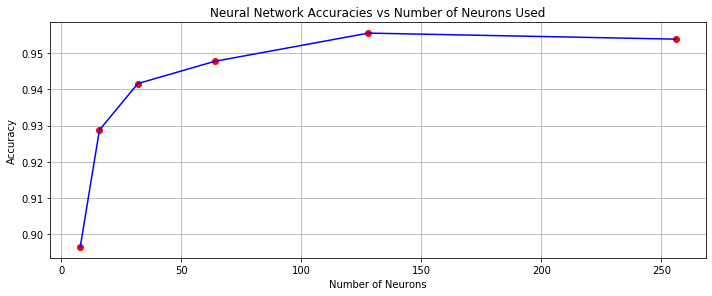

In [15]:
#Using various number of neurons

neurons = [8, 16, 32, 64, 128, 256]
n_accuracies = []
for n in neurons:
    accuracy = cross_validate_nn(n)
    n_accuracies.append(np.mean(accuracy))
    
#Visualize the result
plt.figure(figsize = (10,4))
plt.plot(neurons, n_accuracies, 'ro')
plt.plot(neurons, n_accuracies, 'b')
plt.xlabel('Number of Neurons')
plt.ylabel('Accuracy')
plt.tight_layout()
plt.grid()
plt.title('Neural Network Accuracies vs Number of Neurons Used')

In [16]:
print("The maximum accuracy using single layer Neural Network is %a" % np.round(np.max(n_accuracies),5))
print('\n')
print("The minimum accuracy using single layer Neural Network is %a" % np.round(np.min(n_accuracies),5))

The maximum accuracy using single layer Neural Network is 0.95548


The minimum accuracy using single layer Neural Network is 0.89647


### Insight

_Increasing the number of neurons increases the accuracy as seen from the line chart above. Also note that when instantiating the MLPclassifier, I had to set the max_iter to 2000 to avoid convergence warning_

_Simple accuracy computes the number of correct classifications the model made, but doesn't tell us anything about false or true positives or false or true negatives._

_Given that k-nearest neighbors achieved approximately 96% accuracy, there doesn't seem to be any advantages to using a single hidden layer neural network for this problem._

# Changing the Activation Function

The Sigmoid function used to instantiate the neural network is:
$$S(x) = \frac{1}{1 + e^{-x}}$$

This can also be visualized below

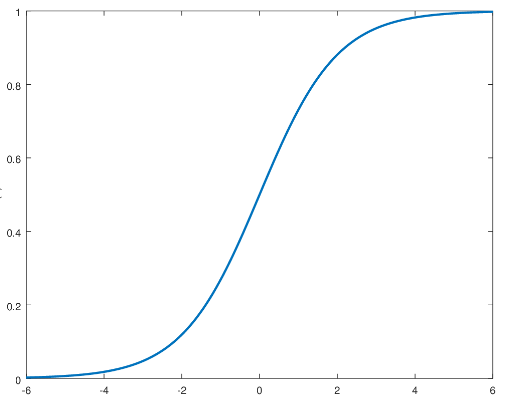

I will use the relu function to see if there is any significant difference

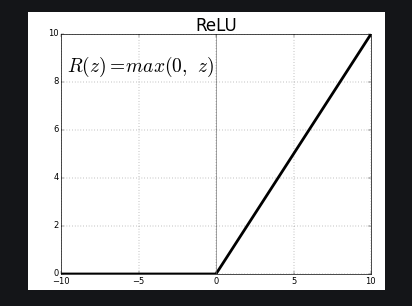

In [17]:
#Single layer Neural Network Model using relu activation function

def train_nn(n, train_features, train_labels):
    'This function uses MLPclassifier algorithm on the dataset'
    
    mlp = MLPClassifier(hidden_layer_sizes=(n,), activation='relu', max_iter=2000)
    
    'The activation function used here is relu function'
    mlp.fit(train_features, train_labels)
    return mlp

def test_nn(model, test_features, test_labels):
    'This function returns the accuracy of a specific model used'
    
    predictions = model.predict(test_features)
    train_test_df = pd.DataFrame()
    train_test_df['correct_label'] = test_labels
    train_test_df['predicted_label'] = predictions
    accuracy = sum(train_test_df['correct_label'] == train_test_df['predicted_label']) / len(train_test_df)
    return accuracy

def cross_validate_nn(k):
    fold_accuracies = []
    kf = KFold(n_splits=4, random_state=2)
    for train_index, test_index in kf.split(data):
        train_features, test_features = data.loc[train_index], data.loc[test_index]
        train_labels, test_labels = labels.loc[train_index], labels.loc[test_index]
        model = train_nn(k, train_features, train_labels)
        overall_accuracy = test_nn(model, test_features, test_labels)
        fold_accuracies.append(overall_accuracy)
    return fold_accuracies

In [18]:
nn_eight_neurons = cross_validate_nn(8)
np.mean(nn_eight_neurons)

0.8658822073744122

Text(0.5, 1, 'Neural Network Accuracies using Relu vs Number of Neurons Used')

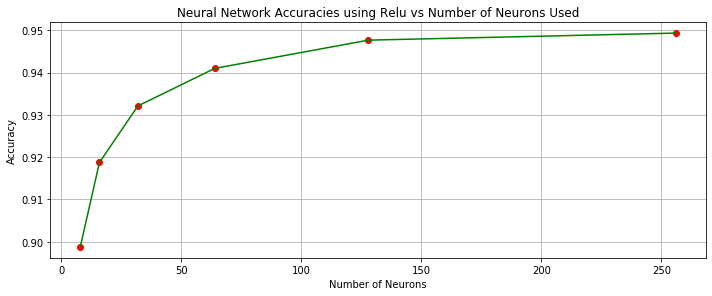

In [19]:
#Using various number of neurons

neurons = [8, 16, 32, 64, 128, 256]
n_accuracies = []
for n in neurons:
    accuracy = cross_validate_nn(n)
    n_accuracies.append(np.mean(accuracy))
    
#Visualize the result
plt.figure(figsize = (10,4))
plt.plot(neurons, n_accuracies, 'ro')
plt.plot(neurons, n_accuracies, 'g')
plt.xlabel('Number of Neurons')
plt.ylabel('Accuracy')
plt.tight_layout()
plt.grid()
plt.title('Neural Network Accuracies using Relu vs Number of Neurons Used')

In [20]:
print("The maximum accuracy using single layer Neural Network with relu function is %a" % np.round(np.max(n_accuracies),5))
print('\n')
print("The minimum accuracy using single layer Neural Network with relu function is %a" % np.round(np.min(n_accuracies),5))

The maximum accuracy using single layer Neural Network with relu function is 0.94935


The minimum accuracy using single layer Neural Network with relu function is 0.89872


### Insight

- Using the relu function actually resulted in a reduction of the maximum accuracy achieved
- The Sigmoid function achieved maximum accuracy with less than 150 neurons used

__I will stick to using sigmoid function going forward__

# Multiple Layer Neural Network

In [21]:
#Two Layer Neural Network Model

def train_nn(n, train_features, train_labels):
    'This function uses MLPclassifier algorithm on the dataset'
    
    mlp = MLPClassifier(hidden_layer_sizes=(n,n), activation='logistic', max_iter=2000)
    
    'The activation function used here is logistic(i.e sigmoid function)'
    mlp.fit(train_features, train_labels)
    return mlp

def test_nn(model, test_features, test_labels):
    'This function returns the accuracy of a specific model used'
    
    predictions = model.predict(test_features)
    train_test_df = pd.DataFrame()
    train_test_df['correct_label'] = test_labels
    train_test_df['predicted_label'] = predictions
    accuracy = sum(train_test_df['correct_label'] == train_test_df['predicted_label']) / len(train_test_df)
    return accuracy

def cross_validate_nn(k):
    fold_accuracies = []
    kf = KFold(n_splits=4, random_state=2)
    for train_index, test_index in kf.split(data):
        train_features, test_features = data.loc[train_index], data.loc[test_index]
        train_labels, test_labels = labels.loc[train_index], labels.loc[test_index]
        model = train_nn(k, train_features, train_labels)
        overall_accuracy = test_nn(model, test_features, test_labels)
        fold_accuracies.append(overall_accuracy)
    return fold_accuracies

In [22]:
#Two layers with eight neurons
nn_two_layer_eight_neurons = cross_validate_nn(8)
np.mean(nn_two_layer_eight_neurons)

0.8424919574362781

Text(0.5, 1, 'Two Layer Neural Network Accuracies vs Number of Neurons Used')

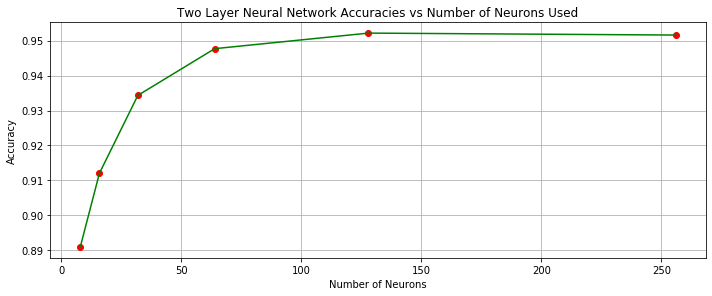

In [23]:
#Using various number of neurons

neurons = [8, 16, 32, 64, 128, 256]
n_accuracies = []
for n in neurons:
    accuracy = cross_validate_nn(n)
    n_accuracies.append(np.mean(accuracy))
    
#Visualize the result
plt.figure(figsize = (10,4))
plt.plot(neurons, n_accuracies, 'ro')
plt.plot(neurons, n_accuracies, 'g')
plt.xlabel('Number of Neurons')
plt.ylabel('Accuracy')
plt.tight_layout()
plt.grid()
plt.title('Two Layer Neural Network Accuracies vs Number of Neurons Used')

In [24]:
print("The maximum accuracy using two layer Neural Network is %a" % np.round(np.max(n_accuracies),5))
print('\n')
print("The minimum accuracy using two layer Neural Network is %a" % np.round(np.min(n_accuracies),5))

The maximum accuracy using two layer Neural Network is 0.95214


The minimum accuracy using two layer Neural Network is 0.89093


### Insight

_Increasing the number of layers reduces the accuracy as seen from the line chart above._

__Using more hidden layers is known to increase the amount of overfitting that happens. To help us prevent overfitting, let's increase the number of folds we use for k-fold cross validation to 6 while testing networks with 3 hidden layers.__

In [25]:
#Three Layer Neural Network Model

def train_nn(n, train_features, train_labels):
    'This function uses MLPclassifier algorithm on the dataset'
    
    mlp = MLPClassifier(hidden_layer_sizes=(n,n,n), activation='logistic', max_iter=2000)
    
    'The activation function used here is logistic(i.e sigmoid function)'
    mlp.fit(train_features, train_labels)
    return mlp

def test_nn(model, test_features, test_labels):
    'This function returns the accuracy of a specific model used'
    
    predictions = model.predict(test_features)
    train_test_df = pd.DataFrame()
    train_test_df['correct_label'] = test_labels
    train_test_df['predicted_label'] = predictions
    accuracy = sum(train_test_df['correct_label'] == train_test_df['predicted_label']) / len(train_test_df)
    return accuracy

def cross_validate_nn(k):
    fold_accuracies = []
    kf = KFold(n_splits=6, random_state=2)
    for train_index, test_index in kf.split(data):
        train_features, test_features = data.loc[train_index], data.loc[test_index]
        train_labels, test_labels = labels.loc[train_index], labels.loc[test_index]
        model = train_nn(k, train_features, train_labels)
        overall_accuracy = test_nn(model, test_features, test_labels)
        fold_accuracies.append(overall_accuracy)
    return fold_accuracies

In [26]:
#Two layers with eight neurons
nn_three_layer_eight_neurons = cross_validate_nn(8)
np.mean(nn_three_layer_eight_neurons)

0.8091062801932366

Text(0.5, 1, 'Three Layer Neural Network Accuracies vs Number of Neurons Used')

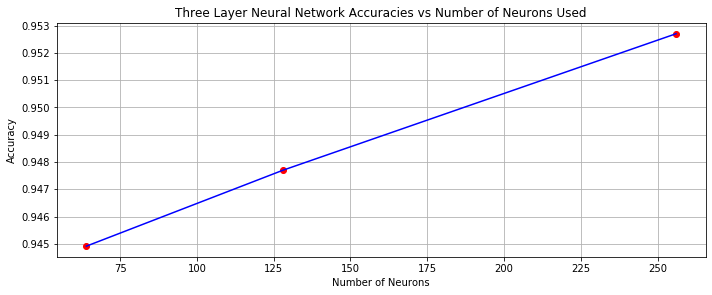

In [27]:
#Using various number of neurons

neurons = [64, 128, 256]
n_accuracies = []
for n in neurons:
    accuracy = cross_validate_nn(n)
    n_accuracies.append(np.mean(accuracy))
    
#Visualize the result
plt.figure(figsize = (10,4))
plt.plot(neurons, n_accuracies, 'ro')
plt.plot(neurons, n_accuracies, 'b')
plt.xlabel('Number of Neurons')
plt.ylabel('Accuracy')
plt.tight_layout()
plt.grid()
plt.title('Three Layer Neural Network Accuracies vs Number of Neurons Used')

In [28]:
print("The maximum accuracy using three layer Neural Network is %a" % np.round(np.max(n_accuracies),5))
print('\n')
print("The minimum accuracy using three layer Neural Network is %a" % np.round(np.min(n_accuracies),5))

The maximum accuracy using three layer Neural Network is 0.9527


The minimum accuracy using three layer Neural Network is 0.94492


# Summary

Using 3 hidden layers reduced our simple accuracy to approximaately 95%, even with 6-fold cross validation. An important thing to note is the time taken to train the model. Using Knn Algorithm is considerably faster than using MLP classifier

# Thank You